[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]
[170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


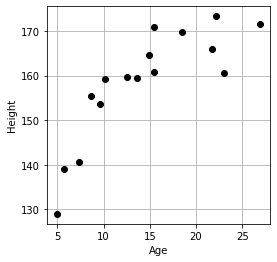

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)   #랜덤 시드를1로 함으로써 랜덤수열이 항상 같음
x_min=4
x_max=30
x_n=16
X=5+25*np.random.rand(x_n)  #5+ 25*(0~1)이므로 5~30살 사이
prm_c=[170,108,0.2]
T=prm_c[0]-prm_c[1]*np.exp(-prm_c[2]*X)+4*np.random.randn(x_n)  #나이가 크다고 키도 같이 커지는걸 조금 조정함
np.savez('ch5_data.npz',X=X,x_min=x_min,x_max=x_max,x_n=x_n,T=T)

print(np.round(X,2))  #소수점3째자리에서 반올림, 2째자리까지 표기
print(np.round(T,2))  
print(T)
plt.figure(figsize=(4,4))
plt.plot(X,T,'ko')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

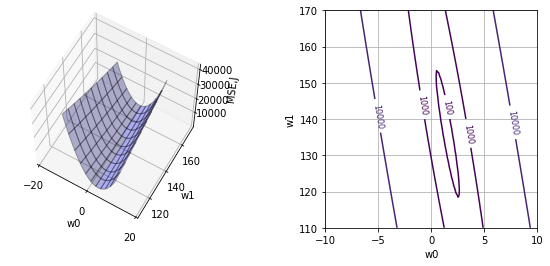

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x,t,w):     # x:나이, t=키, w:매개변수 w=[w0,w1]
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)  # mean함수는 평균을 내어줌
    return mse             #여기까지가 mean squred error 함수 정의 

xn=100
w0_range=[-10,10]
w1_range=[110,170]   #w0,w1에 여러값을 넣어가며 평균제곱오차가 어떻게 변하는지 알아보기위함
x0=np.linspace(w0_range[0],w0_range[1],xn)   #-10 ~ 10사이를 100개로 나눈 벡터
x1=np.linspace(w1_range[0],w1_range[1],xn)   #110 ~ 170사이를 100개로 나눈 벡터
xx0,xx1=np.meshgrid(x0,x1)   #x0과x1를 벡터로 바꿔주는 함수
J=np.zeros((len(x0),len(x1))) #100x100의 영행렬

for i0 in range(xn):       # 100x100 행렬을 채우기 위한 포문 두개
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))  #위에서 정의한 mse_line함수 호출, 매개변수 넣어줌
        
plt.figure(figsize=(9.5,4))    #여기서부턴 그래프표현
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(60,-60)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('MSE,J')

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.xlabel('w0')
plt.ylabel('w1')
plt.grid(True)
plt.show()
                 
#3차원 그래프의 가장 낮은부분이 최적의 w1,w0
#등고선 그래프에서 타원부분

In [17]:
def dmse_line(x,t,w):       # mse의 증분(Gradient) x,t,w는 위에와 같음
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)   #w0 ,w1방향으로의 증분
    d_w1=2*np.mean(y-t)     #필기한 식과 같음(편미분)
    return d_w0,d_w1

d_w=dmse_line(X,T,[4,165])
print(np.round(d_w,1))

#w0에 4, w1에 165를 넣었을때, 즉 (4,165)의 위치에서 기울기는
#[2057.1 , 128.7]

[2057.1  128.7]


Step 13801 : 1.539837 , 136.178066]
Step 13802 : 1.539843 , 136.177965]
Step 13803 : 1.539849 , 136.177865]
Step 13804 : 1.539854 , 136.177764]
Step 13805 : 1.539860 , 136.177664]
Step 13806 : 1.539866 , 136.177563]
Step 13807 : 1.539872 , 136.177463]
Step 13808 : 1.539878 , 136.177362]
Step 13809 : 1.539884 , 136.177262]
Step 13810 : 1.539889 , 136.177162]
Step 13811 : 1.539895 , 136.177061]
Step 13812 : 1.539901 , 136.176961]
Step 13813 : 1.539907 , 136.176861]
Step 13814 : 1.539913 , 136.176761]
Step 13815 : 1.539918 , 136.176661]
Step 13816 : 1.539924 , 136.176560]
Step 13817 : 1.539930 , 136.176460]
Step 13818 : 1.539936 , 136.176360]
Step 13819 : 1.539942 , 136.176260]
반복횟수 13820
W=1.539947,136.176160
dMSE=[-0.005794,0.099991]
MSE=49.027452


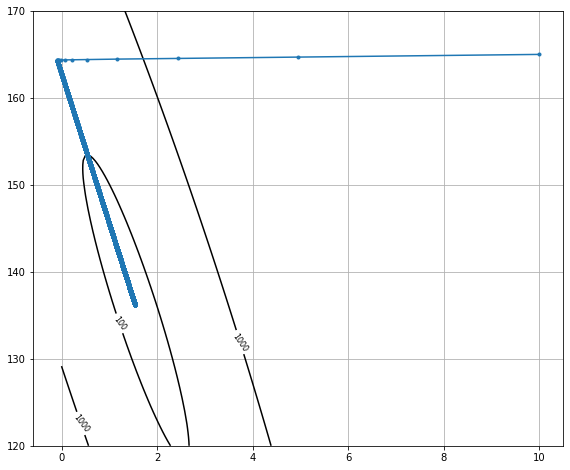

In [22]:
def fit_line_num(x,t):     #경사하강법을 구현한 함수 x는 나이,t는 키,w매개변수
    w_init=[10.0,165.0]    #w의 초기값
    alpha=0.001    #알파는 학습룰 , 한스텝 넘어갈때마다 0.001씩 앞으로 나아간다
    i_max=100000   #최적점을 찾아 나아가는 단게수를 최대 10만번으로 제한
    eps=0.1 #포문으로 최대 10만번 실행될때 10만번 이전에 거의 최적점을 찾으면 거의 안움직이게 되는데 움직이는값이 0.1보다 작으면 탐색그만해
    w_i=np.zeros([i_max,2])  #행은 10만개, 열은2개의 영행렬
    w_i[0,:]=w_init   #0번째 행의 모든 열, 즉 첫줄의 두 원소를 10 165로 해줌
    for i in range(1,i_max):    #i는 1 ~ 99999
        dmse=dmse_line(x,t,w_i[i-1])   # w_i[i-1]번째부터 dmse_line함수에 넣어서 게산
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:   #충분히 최적값에 도달하면(0.1보다 작아졌을때) 포문 끝내기
            break
        if i>13800:  #보통 13000회 실행된다. 이건 거의 수렴할때쯤의 데이터를 프린트해줌
            print('Step {0:d} : {1:.6f} , {2:.6f}]'.format(i,w_i[i,0],w_i[i,1]))
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]   #[처음부터i까지 , 처음부터 끝까지]
    return w0,w1,dmse, w_i

plt.figure(figsize=(9.5,8))
w0_range=[0,5]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
cont=plt.contour(x0,x1,J,30,colors='black',levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

W0,W1,dMSE,W_history=fit_line_num(X,T)

print('반복횟수 {0}'.format(W_history.shape[0]))
print('W={0:.6f},{1:.6f}'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-')
plt.show()
        
# w0=1.539947에서, w2=136.176160에서 수렴, 즉 그래프의 최 저점이다.

#지금까지 해온건 간단하게 이거다. 나이를 주면 키를 나타내는 1차함수 그래프를
# y=w0*x+w1로 놓고 이 w0과 w1을 기준으로 3차원 그래프를 그려서 그 그래프의 최 저점이
# w0과w1의 최적의 값이다.

w0=1.540,w1=136.176
SD=7.002cm


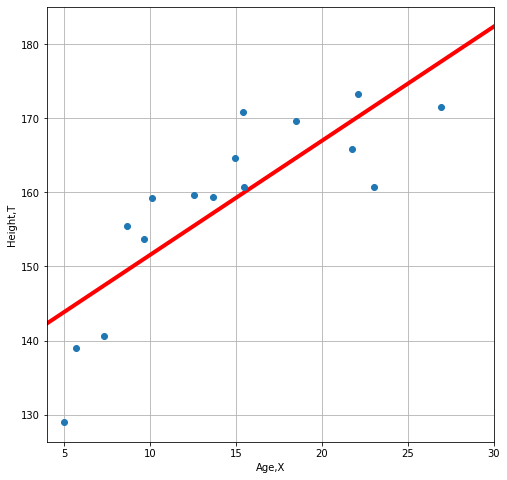

In [31]:
def show_line(w):    #w0,w1을 받아서 선을 그려줌
    xb=np.linspace(x_min,x_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,'r-',linewidth=4)
    
plt.figure(figsize=(8,8))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print("w0={0:.3f},w1={1:.3f}".format(W0,W1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))   #SD는 표준편차

show_line(W)
plt.plot(X,T,'o')
plt.xlim(x_min,x_max)
plt.grid(True)
plt.xlabel('Age,X')
plt.ylabel('Height,T')
plt.show()

#표준편차가 7cm정도라는건 점과 일차함수간의 거리
#나이가 20이라면 키는 168정도로 예측가능 오차는 쁠마7cm